In [1]:
# here I did prediction with combined data sets of 
# Read Length and Read Count

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [3]:
df_gc = pd.read_csv("../../datas_not_to_upload/gc_drop_null.csv")
df_rl = pd.read_csv("../../datas_not_to_upload/rl_drop_null.csv")

In [4]:
df_gc.head(2)

,GC,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9607,V9608,V9609,V9610,V9611,V9612,V9613,V9614,V9615,V9616
0,19.052706,0.879025,0.687329,0.983194,0.970820,0.900728,0.735702,0.960757,1.074772,1.597032,...,1.155784,1.183426,1.116000,1.136232,1.055771,0.805667,0.880747,0.861866,0.799674,1.012808
1,17.772070,0.869801,0.620215,1.008849,0.926203,0.884105,0.884811,1.020117,0.987255,1.335856,...,1.083800,1.294737,1.187249,1.054525,1.070078,0.836637,0.914356,0.805049,0.695066,1.020791


In [5]:
df_rl.head(3)

,GC,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V3601,V3602,V3603,V3604,V3605,V3606,V3607,V3608,V3609,V3610
0,19.052706,1.179333,1.334434,1.403288,1.541632,1.325201,1.101396,1.096208,1.169582,1.201159,...,1.214459,1.137815,1.084471,1.334146,1.159960,1.072909,1.194103,1.202118,1.307157,0.847474
1,17.772070,1.148473,1.422455,1.373932,1.515307,1.337463,1.077379,1.061001,1.157020,1.258965,...,1.162154,1.197372,1.216741,1.290969,1.162834,1.072192,1.150107,1.194950,1.369463,1.132686
2,16.200000,1.189828,1.341258,1.318985,1.428393,1.231587,1.093561,1.002102,1.112995,1.176748,...,1.126933,1.119189,1.113998,1.172282,1.123764,1.037933,1.087116,1.221538,1.271180,1.165280


In [6]:
## 
#df_gc.drop([col for col,value in df_gc.sum().iteritems() if value < 10],axis=1, inplace=True)
#pd.concat([y,df_gc],axis=1).to_csv("../../datas_not_to_upload/gc_drop_null.csv")

# Split data to Train and Test Sets


In [7]:
x_rl = df_rl.iloc[:,1:]
x_gc = df_gc.iloc[:,1:]
y = df_rl["GC"]

In [8]:
def split_data(x,test_size = 0.20, random_state =10 ):
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [9]:
x_train_rl, x_test_rl, y_train_rl, y_test_rl = split_data(x_rl,test_size=0.2, random_state=10)
x_train_gc, x_test_gc , y_train_gc, y_test_gc = split_data(x_gc,test_size=0.2,random_state=10)

In [10]:
# Lets Check both Index are equal or Not
print("x_train _rl 3")
display(x_test_rl[:3])
print("x_train_gc 3")
display(x_test_gc.head(3))

print("y_train_rl 3")

x_train _rl 3


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V3601,V3602,V3603,V3604,V3605,V3606,V3607,V3608,V3609,V3610
937,1.148863,1.236624,1.273476,1.594509,1.119174,1.017691,0.946570,0.997322,1.146759,1.075649,...,1.094923,1.066034,1.012995,1.124494,1.00989,0.990103,1.102685,1.138949,1.190696,1.450708
9355,1.247705,1.417974,1.248661,2.003602,1.166130,1.036487,0.970803,1.150281,1.234875,1.115482,...,1.247111,1.138742,1.156699,1.214721,1.14126,1.029806,1.057033,1.288271,1.356013,1.359966
2293,1.217422,1.264813,1.180422,1.665205,1.140997,1.014608,0.970974,0.997261,1.109847,0.999425,...,1.052208,1.009529,1.000934,1.131235,1.04064,1.029634,1.034725,1.126542,1.308551,0.984150


x_train_gc 3


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9607,V9608,V9609,V9610,V9611,V9612,V9613,V9614,V9615,V9616
937,0.959231,0.799453,1.326316,0.821119,0.956507,0.772290,0.983940,0.984026,1.586564,1.278902,...,1.218071,1.265855,1.248562,1.234563,1.086126,0.844246,0.817693,0.876737,0.709895,1.023527
9355,0.869949,0.875055,1.135056,0.953710,0.850591,0.891380,1.033587,1.058201,1.594433,1.115274,...,1.070740,1.157376,1.064536,1.045779,1.038547,0.862965,0.898523,0.920337,0.731688,1.021389
2293,0.844195,0.747872,1.050042,0.985533,0.853833,0.803392,0.946191,1.093843,1.664460,1.157345,...,1.125719,1.206644,1.168575,1.237721,1.091236,0.867132,0.886125,0.834293,0.743254,1.011248


y_train_rl 3


# Scaling
` There are Two Methods of Normalilzation and standardization`
## Normalization  (change between 0~1)
## Standardization ( distribution mean 0 and sd 1)

## Scalling GC data sets

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_gc.iloc[:,1:])
x_train_gc = scaler.transform(x_train_gc)
x_test_gc = scaler.transform(x_test_gc)

## Scalling RL data sets

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_rl.iloc[:,1:])
x_train_rl = scaler.transform(x_train_rl)
x_test_rl = scaler.transform(x_test_rl)

## Bayesian Model for rl_data sets

Model Accuracy is :  0.7399177924097842


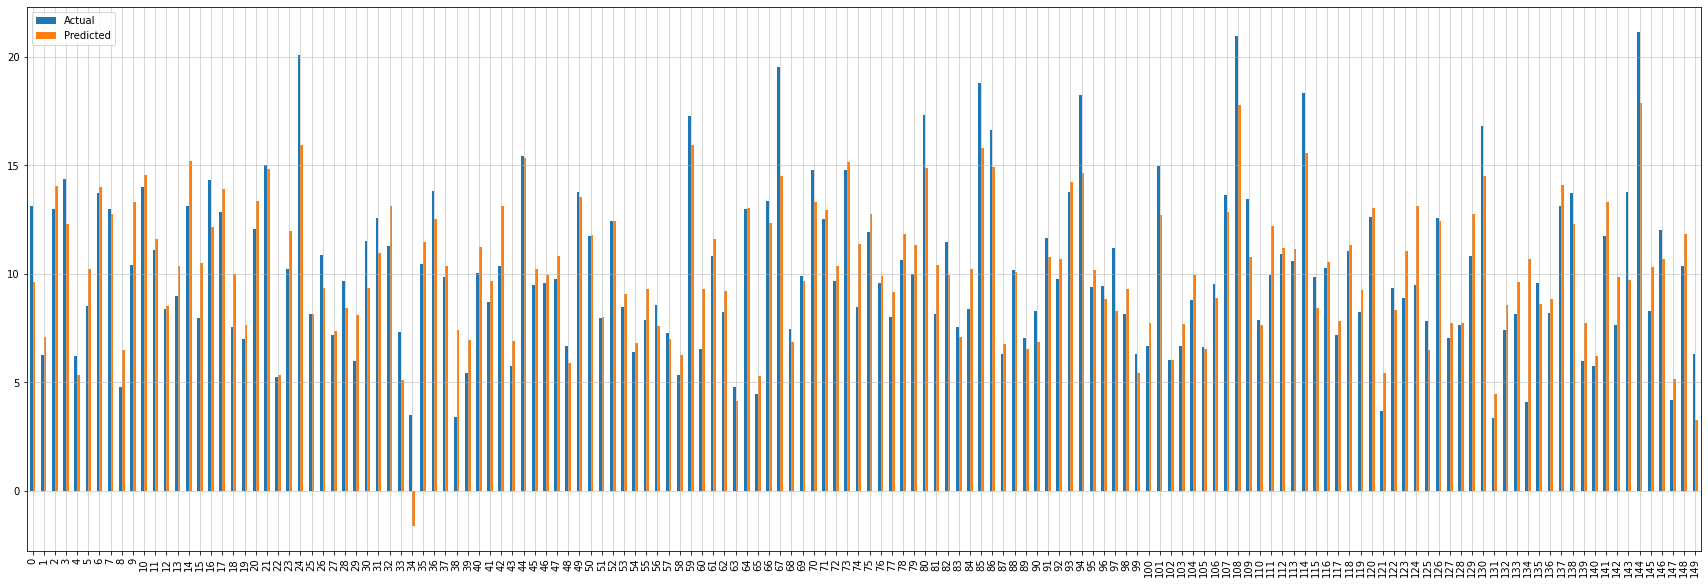

,Actual,Predicted
0,13.119819,9.634850
1,6.287667,7.092771
2,13.004863,14.036196
3,14.370000,12.310694
4,6.223930,5.351118


In [16]:
# Bayesian in Original Data Before Scalling
bayesian_ = linear_model.BayesianRidge().fit(x_train_rl, y_train_rl)
bayesian_y_pred_ = bayesian_.predict(x_test_rl)
bayesian_ = pd.DataFrame({"Actual":y_test_rl.to_numpy().flatten(), "Predicted":bayesian_y_pred_.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test_rl, bayesian_y_pred_))
bayesian_.head(150).plot(kind = "bar", figsize=(30, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

bayesian_.head()

## bayesian Model for gc_data Sets

In [ ]:
# Bayesian in Original Data Before Scalling
bayesian_ = linear_model.BayesianRidge().fit(x_train_gc, y_train_gc)
bayesian_y_pred_ = bayesian_.predict(x_test_gc)
bayesian_gc = pd.DataFrame({"Actual":y_test_rl.to_numpy().flatten(), "Predicted":bayesian_y_pred_.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred_))
bayesian_gc.head(150).plot(kind = "bar", figsize=(30, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

bayesian_gc.head()

# PCA

## GC

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(200)
pca.fit(x_train_gc)
x_train_gc_pca = pca.transform(x_train_gc)
x_test_gc_pca = pca.transform(x_test_gc)

## RL

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(300)
pca.fit(x_train_rl)
x_train_rl_pca = pca.transform(x_train_rl)
x_test_rl_pca = pca.transform(x_test_rl)

## Bayesian Regression from PCA Data Sets

In [ ]:
#In the above we can see Column reduced to 100
# Lets Fit the Model
bayesian_ = linear_model.BayesianRidge().fit(x_train_gc_pca, np.ravel(y_train))
bayesian_y_pred = bayesian_.predict(x_test_gc_pca)
bayesian_gc = pd.DataFrame({"Actual":np.ravel(y_test),
                          "Predicted":bayesian_y_pred.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred))
bayesian_gc.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
bayesian_gc.head()

In [ ]:
# Read Length Data Sets

#In the above we can see Column reduced to 100
# Lets Fit the Model
bayesian_ = linear_model.BayesianRidge().fit(x_train_rl_pca, np.ravel(y_train))
bayesian_y_pred = bayesian_.predict(x_test_rl_pca)
bayesian_rl = pd.DataFrame({"Actual":np.ravel(y_test),
                          "Predicted":bayesian_y_pred.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred))
bayesian_rl.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
bayesian_rl.head()

#  Deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
print(tf.__version__)

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
x_train_gc_pca.shape, y_train.shape

## GC

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(5, activation = "relu",
                      input_shape = [x_train_gc_pca.shape[1],]))

#model.add(layers.Dense(2,activation = "relu"))

model.add(layers.Dense(1)) # Only One Output because of Regression Problem

# Compile the Model
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer = optimizer, loss = "mse",
             metrics = ["accuracy","mse"])

# Early Stops if fit  (Which wilp to stop Over Fitting)
early_stop = keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Fit the Model
model.fit(x_train_gc_pca, y_train, epochs = 100 , validation_split = 0.02,\
          verbose = 0, callbacks = [early_stop, tfdocs.modeling.EpochDots()])

## Evaluate the Model
loss, acc, _ = model.evaluate(x_test_gc_pca,y_test_gc, verbose = 0)


print("\nTest Accuracy = %.3f"%acc, loss , _)

##
keras_pred_gc = model.predict(x_test_gc_pca)
print("Accuracy", metrics.r2_score(y_test_gc, keras_pred_gc))

keras_gc = pd.DataFrame({"Actual":y_test_gc.to_numpy().flatten(),
                       "Predicted":keras_pred_gc.flatten()})

print(np.corrcoef(keras_gc["Actual"],keras_gc["Predicted"])[1][0])
keras_gc.tail(150).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
display(keras_gc.head(100))

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(4, activation = "relu",
                      input_shape = [x_train_rl_pca.shape[1],]))

model.add(layers.Dense(2,activation = "relu"))

model.add(layers.Dense(1)) # Only One Output because of Regression Problem

# Compile the Model
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer = optimizer, loss = "mse",
             metrics = ["accuracy","mse"])

# Early Stops if fit  (Which wilp to stop Over Fitting)
early_stop = keras.callbacks.EarlyStopping(monitor="loss", patience=20)

# Fit the Model
model.fit(x_train_rl_pca, y_train, epochs = 100 , validation_split = 0.02,\
          verbose = 0, callbacks = [early_stop, tfdocs.modeling.EpochDots()])

## Evaluate the Model
loss, acc, _ = model.evaluate(x_test_rl_pca,y_test_rl, verbose = 0)


print("\nTest Accuracy = %.3f"%acc, loss , _)

##
keras_pred_rl = model.predict(x_test_rl_pca)
print("Accuracy", metrics.r2_score(y_test_rl, keras_pred_rl))

keras_rl = pd.DataFrame({"Actual":y_test_rl.to_numpy().flatten(),
                       "Predicted":keras_pred_rl.flatten()})

print(np.corrcoef(keras_rl["Actual"],keras_rl["Predicted"])[1][0])
keras_rl.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
display(keras_rl.head(100))

## Lets make Average

In [ ]:
#average = df.
predicted = pd.concat([keras_rl.mean(axis=1), keras_gc.mean(axis = 1)],axis=1).mean(axis = 1)

In [ ]:
y_test.shape , predicted.shape

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
predicted.head()

In [ ]:
#test = pd.DataFrame(y_test)
#predicted = pd.DataFrame(predicted)
predicted.columns = ["Predicted"]
predicted_merged = pd.concat([test,predicted],axis=1)
predicted_merged.head()

In [ ]:
print("Accuracy", metrics.r2_score(predicted_merged["Predicted"], predicted_merged["GC"]))
print(np.corrcoef(predicted_merged["Predicted"], predicted_merged["GC"])[1][0]) # Correlation

predicted_merged.tail(150).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
display(predicted_merged.head(100))